In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Partie 1 : Analyse et nettoyage du fichier 'web'

## 1.1 Analyse du fichier 'web' 

### On va chercher et vérifier: 
### -Les NaN 
### -Les doublons 
### -Les noms des colonnes

In [2]:
df_web = pd.read_csv('web.csv',sep = ';')

In [3]:
#On affiche les informations du fichier avant nettoyage
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [4]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
#On va commencer par chercher combien de valeurs sont manquantes pour chaque colonne en allant chercher les NaN
print(df_web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


### Le SKU qui est entre autre la PK a 85 valeurs en NaN, la plupart des autres en ont 83

### Il devrait donc y avoir 2 lignes où le sku vaut "NaN" et les autres ont des données

In [6]:
#On va chercher les sku ayant NaN comme valeur
df_web_nan = df_web[df_web['sku'].isna()]
df_web_nan.head(30)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Les deux lignes correspondent à des produits qui ont été retirés de la vente
### La date de publication correspond à 2018 et la dernière modification date de 2019

In [7]:
#On va chercher les deux lignes ayant le post type en product et le sku en NaN
sku470_471 = df_web.loc[(df_web['sku'].isnull()) & (df_web['tax_status'] == "taxable"),:]

In [8]:
sku470_471.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### On va maintenant aller regarder les doublons

In [9]:
#On affiche la somme des doublons des id du sku du fichier
df_web.duplicated('sku').sum()


798

In [10]:
#On affiche les lignes dont il existe plusieurs fois le même Sku
df_web.loc[df_web['sku'].duplicated(keep = False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [11]:
#On affiche un aperçu de 'bon-cadeau-25-euros'
df_web.loc[df_web['sku'] == 'bon-cadeau-25-euros']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### On remarque que la différence entre les deux lignes se fait au niveau du tax status, du post type et du post mime type

## 1.2 Nettoyage du fichier web

### Nous allons garder les lignes contenant une image/jpeg au post mime type car cela est plus pertinent pour un site web

In [12]:
#On ne garde que les lignes contenant des images dans le post mime type
df_web = df_web[df_web.post_mime_type == "image/jpeg"]

In [13]:
df_web.duplicated('sku').sum()

0

In [14]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [15]:
#On vérifie si il reste des valeurs NaN dans la colonne Sku
df_web["sku"].isnull().values.any()


False

In [16]:
#On supprime les colonnes contenant des NaN uniquement
df_web = df_web.dropna(how = 'all', axis=1)

### On va maintenant vérifier le noms des colonnes

In [17]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### La colonne sku correspond à l'id du fichier web
### Ici, nous allons renommer la colonne sku en id_web

In [18]:
#On renomme la colonne sku en id_web
df_web = df_web.rename(columns = {'sku':"id_web"})

In [19]:
#Affichage du dataframe nettoyé
df_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [20]:
#On affiche les informations du fichier après le nettoyage
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 799 to 1512
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_web             714 non-null    object 
 1   virtual            714 non-null    int64  
 2   downloadable       714 non-null    int64  
 3   rating_count       714 non-null    int64  
 4   average_rating     714 non-null    float64
 5   total_sales        714 non-null    float64
 6   post_author        714 non-null    float64
 7   post_date          714 non-null    object 
 8   post_date_gmt      714 non-null    object 
 9   post_title         714 non-null    object 
 10  post_status        714 non-null    object 
 11  comment_status     714 non-null    object 
 12  ping_status        714 non-null    object 
 13  post_name          714 non-null    object 
 14  post_modified      714 non-null    object 
 15  post_modified_gmt  714 non-null    object 
 16  post_parent        714 

# Partie 2 : Analyse  et nettoyage du fichier liaison

## 2.1 Analyse du fichier liaison 

In [21]:
#On ouvre le fichier liaison
df_liaison = pd.read_csv('liaison.csv',sep = ';')

In [22]:
#On affiche les informations du fichier
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [23]:
#On affiche le dataframe correspondant au fichier
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### On va regarder les NaN et les doublons

In [24]:
#On va commencer par chercher combien de valeurs sont manquantes pour chaque colonne en allant chercher les NaN
print(df_liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


In [25]:
#On affiche le nombre de doublons dans la colonne 'product_id'
df_liaison.duplicated('product_id').sum()

0

In [26]:
#On affiche le nombre de doublons dans la colonne 'id_web'
df_liaison.duplicated('id_web').sum()

90

## 2.2 Suppression des doublons et des NaN

In [27]:
#On va chercher les NaN dans la colonne id web
liaison_nan = df_liaison[df_liaison['id_web'].isna()]
liaison_nan.head(20)

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
184,4278,NaN
185,4279,NaN
234,4565,NaN
238,4577,NaN


### On suppose que si l'id web est null, c'est qu'aucun de ces produits n'ont été ajoutés sur le site

In [28]:
#On va donc se débarasser des colonnes ayant un id web en NaN
df_liaison = df_liaison.dropna()

In [29]:
#On vérifie s'il reste des valeurs nulles dans les deux colonnes du dataframe
print(df_liaison.isnull().sum())

product_id    0
id_web        0
dtype: int64


In [30]:
#On vérifie qu'on a bien supprimé les doublons également
df_liaison.duplicated('id_web').sum()


0

In [31]:
#On affiche les information du fichier après le nettoyage
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


# Partie 3 : Analyse  et nettoyage du fichier ERP

## 3.1 Analyse du fichier ERP

In [32]:
df_erp = pd.read_csv('erp.csv',sep = ';')

In [33]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [34]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


### Il semblerait à la première analyse qu'il n'y a pas de différence entre les colonnes 

In [35]:
#On va chercher s'il existe des NaN dans les colonnes du fichier ERP
print(df_erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [36]:
df_erp.duplicated('product_id').sum()

0

### Le fichier ERP est déjà nettoyé, aucune modification n'est nécessaire 

# Partie 4 : Rapprochement entre le fichier web et ERP à l'aide du fichier liaison

In [37]:
#On va rapprocher dans un premier temps le fichier ERP et liaison à l'aide de la colonne product_id
df_fusionne = df_erp.merge(right = df_liaison, on = ['product_id'])

In [38]:
df_fusionne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      734 non-null    int64  
 1   onsale_web      734 non-null    int64  
 2   price           734 non-null    float64
 3   stock_quantity  734 non-null    int64  
 4   stock_status    734 non-null    object 
 5   id_web          734 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 40.1+ KB


In [39]:
#On affiche notre dataframe avec erp et liaison combiné
df_fusionne.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [40]:
#Puis on va rajouter le fichier web au dataframe à l'aide de la colonne id_web
df_fusionne = df_fusionne.merge(right = df_web, on = ['id_web'])

In [41]:
df_fusionne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         714 non-null    int64  
 1   onsale_web         714 non-null    int64  
 2   price              714 non-null    float64
 3   stock_quantity     714 non-null    int64  
 4   stock_status       714 non-null    object 
 5   id_web             714 non-null    object 
 6   virtual            714 non-null    int64  
 7   downloadable       714 non-null    int64  
 8   rating_count       714 non-null    int64  
 9   average_rating     714 non-null    float64
 10  total_sales        714 non-null    float64
 11  post_author        714 non-null    float64
 12  post_date          714 non-null    object 
 13  post_date_gmt      714 non-null    object 
 14  post_title         714 non-null    object 
 15  post_status        714 non-null    object 
 16  comment_status     714 non

In [42]:
#On affiche le dataframe contenant les données des fichiers
df_fusionne.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


# Partie 5 : Visualisation des données

## 5.1 Chiffre d’affaires par produit

In [43]:
#On ajoute une colonne qui donne le chiffre d'affaire par produit
df_fusionne["Chiffre par produit"] = df_fusionne["price"]* df_fusionne["total_sales"]

In [44]:
#On affiche le dataframe
df_fusionne.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Chiffre par produit
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,0.0


## 5.2 Chiffre d'affaire total

In [45]:
#On stock dans catotal la somme des chiffres par produit pour avoir le chiffre d'affaire total
catotal = df_fusionne["Chiffre par produit"].sum()
print("Le chiffre d'affaire total est de ", catotal, "€")

Le chiffre d'affaire total est de  70568.6 €


## 5.3 Recherche des valeurs abérrantes 

In [46]:
df_fusionne["price"].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [47]:
#Affichage de l'écart-type
df_fusionne["price"].std()

27.810524922323726

In [48]:
#Affichage de la moyenne des prix
df_fusionne["price"].mean()

32.49313725490197

<AxesSubplot:xlabel='product_id', ylabel='price'>

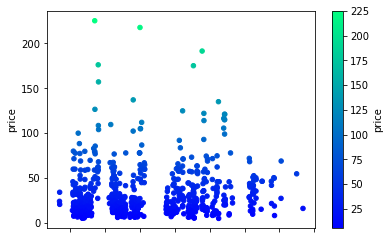

In [49]:
#On affiche sous forme d'un nuage de points les prix pour vérifier s'il y a des valeurs abérrantes 
df_fusionne.plot.scatter(x='product_id', y='price', c = 'price', cmap = 'winter')

### On remarque qu'il y a une dizaine de valeurs qui sortent du lot

In [50]:
#Calcul du coefficient de variation : rapport de l'écart-type à la moyenne
coeff_variation = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
coeff_variation(df_fusionne['price'])

85.58891898974201

### On a donc une dispersion des prix autour de la moyenne de l'ordre de 86% ce qui est très élevée

## Calcul des quartiles

In [51]:
#Calcul du 1er quartile
Q1 = (np.quantile(df_fusionne['price'], 0.25))
print(Q1)

14.1


In [52]:
#Calcul du 3eme quartile
Q3 = (np.quantile(df_fusionne['price'], 0.75))
round(Q3,2)

42.18

In [53]:
#Calcul de l'écart interquartile Q3-Q1
EcartIQ = Q3-Q1
round(EcartIQ,2)

28.08

### 50% des prix des produits sont concentrés entre environ 14.10€ et 42.18€
### 25% des prix des produits sont inférieurs à 14,10€
### 25% des prix des produits sont supérieurs à 42,18€ 

<AxesSubplot:xlabel='price'>

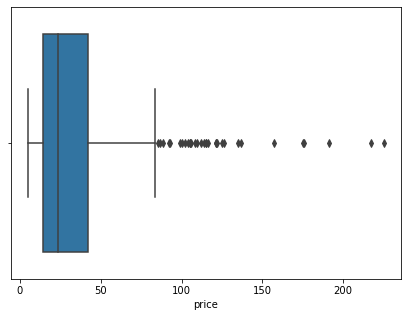

In [54]:
plt.figure(figsize=(7,5))
sns.boxplot(x= 'price', data= df_fusionne)

In [55]:
#on va chercher le prix qui représente le top 1%
q = df_fusionne["price"].quantile(0.99)
q

133.89500000000004

In [56]:
#On stock dans outliers_10 les prix supérieurs au quantile 0.99 
outliers_10 = df_fusionne[df_fusionne["price"] > q]
outliers_10

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Chiffre par produit
199,4352,1,225.0,0,outofstock,15940,0,0,0,0.0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,1125.0
218,4402,1,176.0,8,instock,3510,0,0,0,0.0,...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,2288.0
221,4406,1,157.0,3,instock,7819,0,0,0,0.0,...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,0.0
381,4904,1,137.0,13,instock,14220,0,0,0,0.0,...,domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,2020-05-19 15:15:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,685.0
426,5001,1,217.5,20,instock,14581,0,0,0,0.0,...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,0.0
553,5767,1,175.0,12,instock,15185,0,0,0,0.0,...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,0.0
587,5892,1,191.3,10,instock,14983,0,0,0,0.0,...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,573.9
642,6126,1,135.0,10,instock,14923,0,0,0,0.0,...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,270.0


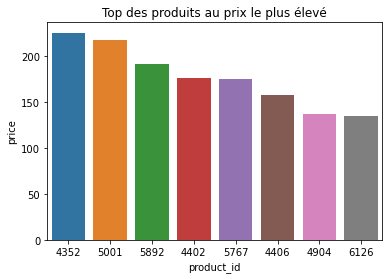

In [57]:
#On affiche la liste des produits qui ont un prix les plus élevé
sns.barplot(y=outliers_10.price, x=outliers_10.product_id, order = outliers_10.sort_values('price', ascending=False).product_id)
plt.title('Top des produits au prix le plus élevé')
plt.show()

### En conclusion, les prix considérés comme aberrants (outliers) ne le sont pas vraiment. Car, si les prix sont aussi élevés, c'est parce qu'il s'agit de vins de haute qualité.